<a href="https://colab.research.google.com/github/kongqiahaha/python-/blob/master/%E8%89%B2%E5%9B%BE%E6%A3%80%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as ke
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
from skimage.transform import resize
import os

In [0]:
Y=[]
for i in range(782):
  Y.append(0)
for i in range(416):
  Y.append(1)


In [17]:
len(Y)

1198

In [0]:
Y=np.array(Y).reshape((len(Y),1))

In [11]:
X=[]

directory_name="/content/drive/My Drive/data/色图检定/普通"
for i in range(len(os.listdir(directory_name))):
  image=plt.imread(directory_name+"/"+str(i)+r".jpg")
  image=resize(image,(299,299,3))
  X.append(image)
directory_name="/content/drive/My Drive/data/色图检定/r"
for i in range(782,1198):
  image=plt.imread(directory_name+"/"+str(i)+r".jpg")
  image=resize(image,(299,299,3))
  X.append(image)
X=np.array(X)
X.shape

(1198, 299, 299, 3)

In [0]:
def mix(x,y):
  m=x.shape[0]
  print(m)
  permutation = list(np.random.permutation(m))
  shuffled_x = x[permutation]
  shuffled_y = y[permutation]
  return shuffled_x,shuffled_y

In [20]:
x,y=mix(X,Y)

1198


In [0]:
x_train=x[:700]
y_train=y[:700]
x_test=x[700:]
y_test=y[700:]

In [22]:
base_model=ke.applications.inception_v3.InceptionV3(weights="imagenet",include_top=False)
x=base_model.output
x=ke.layers.GlobalAveragePooling2D()(x)
x=ke.layers.Dense(1024,activation="relu")(x)
predictions=ke.layers.Dense(1,activation="sigmoid")(x)
model3 =ke.Model(inputs=base_model.input,outputs=predictions)

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
def setup_to_transfer_learning(model3,base_model):#base_model
    for layer in base_model.layers:
        layer.trainable = False
    model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
setup_to_transfer_learning(model3,base_model)
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [27]:
model3.fit(x_train,y_train,epochs=1)

Train on 700 samples
700/700 [==============================] - 173s 248ms/sample - loss: 0.2517 - accuracy: 0.9157


In [28]:
pred=model3.evaluate(x_test,y_test)

498/498 [==============================] - 107s 215ms/sample - loss: 0.5367 - accuracy: 0.7671


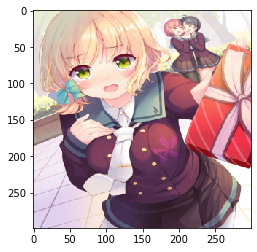

In [54]:
test=plt.imread("./990.jpg")
test=resize(test,(299,299,3))
test=test.reshape(1,299,299,3)
plt.imshow(test[0])

In [55]:
preds= np.squeeze(model3.predict(test))
predect= preds>=0.5

if predect:
  print("这张图可能是h图")
else:
  print("这张图可能不是h图")
print(preds)

这张图可能不是h图
0.014613192
